## Penguin Dataset Practice

In [1]:
import pandas as pd

df = pd.read_csv("penguins.csv")
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [3]:
df = df.drop('Comments', axis=1)  # 결측치가 많은 Comment 열은 아예 삭제
df = df.dropna()                  # 나머지 열에 대해서는 결측치가 있는 행을 삭제
df = df[df.Sex!='.']              # 이상치 제거
df.isnull().sum()

studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [4]:
# 불필요해보이는 Columns
columns = ['Region', 'Stage', 'Individual ID', 'Date Egg', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

df = df.drop(columns, axis=1)
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Island', 'Clutch Completion',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex'],
      dtype='object')

In [5]:
from sklearn.preprocessing import StandardScaler

# 수치형 데이터에 대한 스케일링
columns_to_scale = ['Culmen Depth (mm)', 'Culmen Length (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df[columns_to_scale].head()

,Culmen Depth (mm),Culmen Length (mm),Flipper Length (mm),Body Mass (g)
1,0.138739,-0.832100,-1.091764,-0.512317
2,0.444184,-0.685906,-0.446007,-1.192986
4,1.105981,-1.343780,-0.589508,-0.945470
5,1.767779,-0.868649,-0.804761,-0.697954
6,0.342369,-0.941746,-1.450518,-0.728893


In [6]:
df.head()

,studyName,Sample Number,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,-0.832100,0.138739,-1.091764,-0.512317,FEMALE
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,-0.685906,0.444184,-0.446007,-1.192986,FEMALE
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,-1.343780,1.105981,-0.589508,-0.945470,FEMALE
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,-0.868649,1.767779,-0.804761,-0.697954,MALE
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Torgersen,No,-0.941746,0.342369,-1.450518,-0.728893,FEMALE


In [7]:
from sklearn.preprocessing import LabelEncoder

# 타겟 데이터가 될 Species에 대한 라벨 인코딩
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,studyName,Sample Number,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
1,PAL0708,2,0,Torgersen,Yes,-0.832100,0.138739,-1.091764,-0.512317,FEMALE
2,PAL0708,3,0,Torgersen,Yes,-0.685906,0.444184,-0.446007,-1.192986,FEMALE
4,PAL0708,5,0,Torgersen,Yes,-1.343780,1.105981,-0.589508,-0.945470,FEMALE
5,PAL0708,6,0,Torgersen,Yes,-0.868649,1.767779,-0.804761,-0.697954,MALE
6,PAL0708,7,0,Torgersen,No,-0.941746,0.342369,-1.450518,-0.728893,FEMALE


In [8]:
# 타겟 데이터 분리
dfX = df.drop("Species", axis=1)
dfy = df['Species']

dfX.head()

,studyName,Sample Number,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
1,PAL0708,2,Torgersen,Yes,-0.832100,0.138739,-1.091764,-0.512317,FEMALE
2,PAL0708,3,Torgersen,Yes,-0.685906,0.444184,-0.446007,-1.192986,FEMALE
4,PAL0708,5,Torgersen,Yes,-1.343780,1.105981,-0.589508,-0.945470,FEMALE
5,PAL0708,6,Torgersen,Yes,-0.868649,1.767779,-0.804761,-0.697954,MALE
6,PAL0708,7,Torgersen,No,-0.941746,0.342369,-1.450518,-0.728893,FEMALE


In [9]:
# 범주형 데이터를 One-Hot Encoding
onehot = ['studyName', 'Island', 'Clutch Completion', 'Sex']

dfX = pd.concat([dfX.drop(onehot, axis=1), pd.get_dummies(dfX[onehot], drop_first=True)], axis=1)
dfX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 1 to 343
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sample Number          324 non-null    int64  
 1   Culmen Length (mm)     324 non-null    float64
 2   Culmen Depth (mm)      324 non-null    float64
 3   Flipper Length (mm)    324 non-null    float64
 4   Body Mass (g)          324 non-null    float64
 5   studyName_PAL0809      324 non-null    uint8  
 6   studyName_PAL0910      324 non-null    uint8  
 7   Island_Dream           324 non-null    uint8  
 8   Island_Torgersen       324 non-null    uint8  
 9   Clutch Completion_Yes  324 non-null    uint8  
 10  Sex_MALE               324 non-null    uint8  
dtypes: float64(4), int64(1), uint8(6)
memory usage: 17.1 KB


In [10]:
dfX.head()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),studyName_PAL0809,studyName_PAL0910,Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_MALE
1,2,-0.832100,0.138739,-1.091764,-0.512317,0,0,0,1,1,0
2,3,-0.685906,0.444184,-0.446007,-1.192986,0,0,0,1,1,0
4,5,-1.343780,1.105981,-0.589508,-0.945470,0,0,0,1,1,0
5,6,-0.868649,1.767779,-0.804761,-0.697954,0,0,0,1,1,1
6,7,-0.941746,0.342369,-1.450518,-0.728893,0,0,0,1,0,0


In [11]:
from sklearn.model_selection import train_test_split

# train과 test로 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)

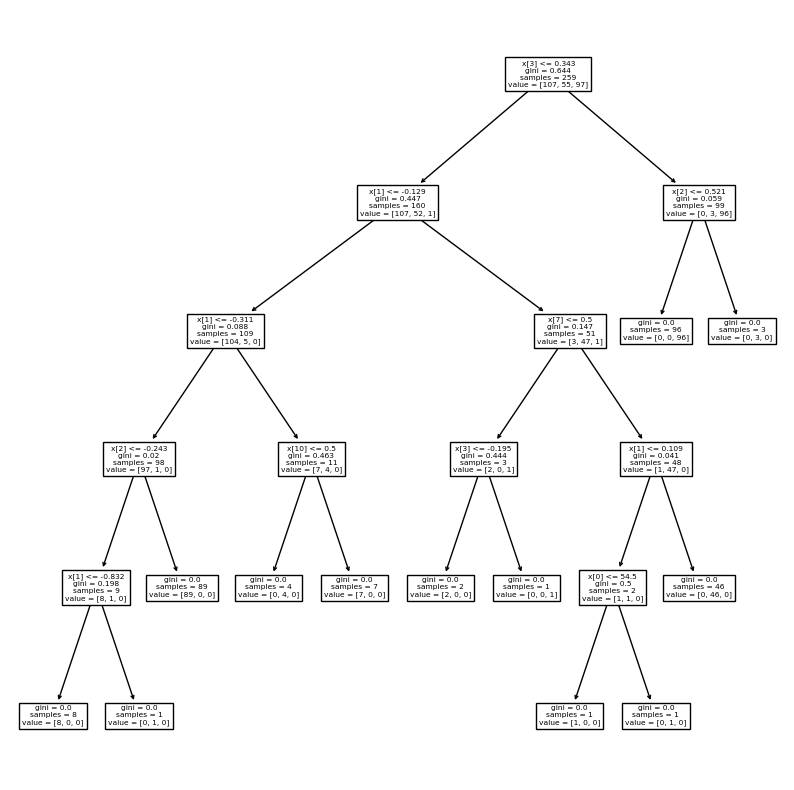

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# DecisionTree 모델 생성 및 학습
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# 의사결정 나무 그리기
plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

# 평가 지표로 정확도 체크
y_pred = dtc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("정확도 :", acc)

정확도 : 0.9692307692307692


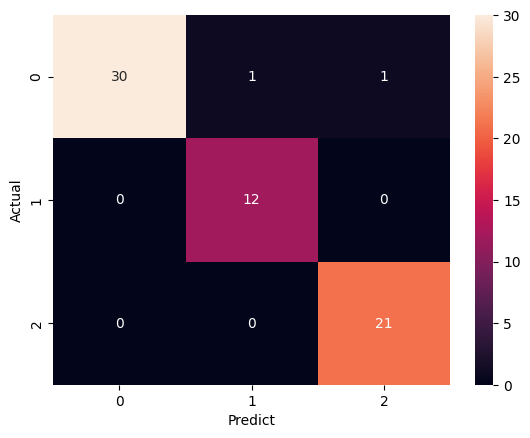

In [22]:
import seaborn as sns

# 혼동 행렬로 히트맵 작성
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cf, annot=True, fmt='d')
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()